In [18]:
import cv2
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [19]:
import sys
sys.path.append('../')
import Image

# Klasa
artybuty:
- bnw_image
- linie pionowe
- linie poziome
- orientacja drzewa - podana przez użytkownika

metody:
- convert to BnW
- niezerowe pixele
- znajdowanie linii poziomych i pionowych
- znajdowanie przecieć
- znajdowanie liści
- przekrecanie drzewa (ewentualnie?)

In [39]:
def detect_and_vis_lines(image_path, max_gap=2, min_line_length=20, min_freq=10, ymin=None, ymax=None):
    image = Image.Image(image_path)
    print(f"Nonzero = {image.nonzero_pixels[:5]}")

    v_lines, h_lines = image.find_all_lines(max_gap=max_gap, min_line_length=min_line_length, min_freq=min_freq)

    plt.figure(figsize=(10,6))
    for line in list(v_lines.values()) + list(h_lines.values()):
        if line:
            x1, y1 = line[0][0]
            x2, y2 = line[0][1]
            plt.plot([x1, x2], [y1, y2], marker='o')
    if ymax is not None and ymin is not None:
        plt.ylim(ymax, ymin)
    plt.show()

Nonzero = [(117, 15), (117, 16), (118, 16), (117, 17), (118, 17)]
Number of y points with frequency > 10: 75
Number of x points with frequency > 10: 22


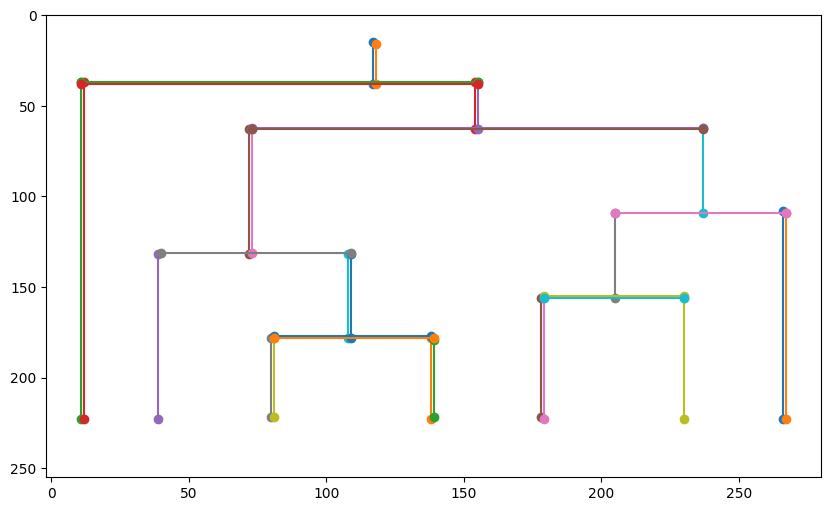

In [40]:
detect_and_vis_lines('../test_data/dendogram2.png', ymax=255, ymin=0)

### Second example

Nonzero = [(1250, 30), (1251, 30), (1252, 30), (1253, 30), (1254, 30)]
Number of y points with frequency > 5: 1101
Number of x points with frequency > 5: 1324


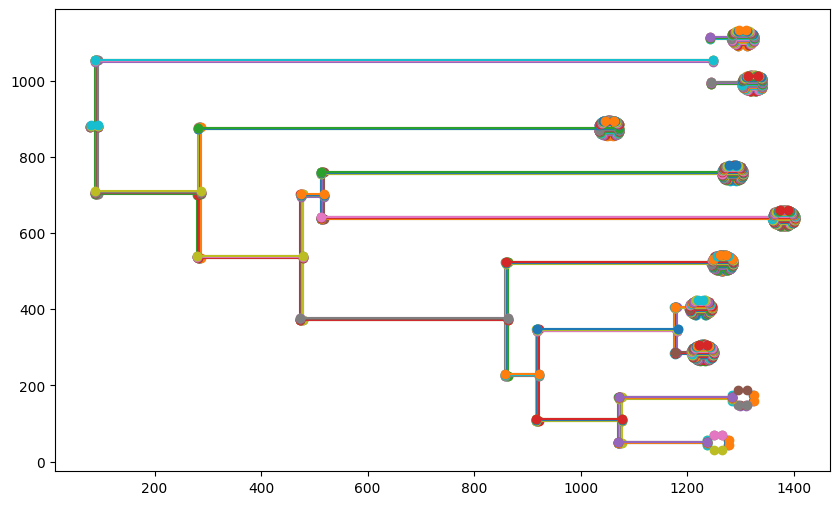

In [44]:
detect_and_vis_lines('../test_data/tree_askew_cropped.png', min_line_length=10, min_freq=5)